Dataset Overview:
Dataset shape: (1999, 9)
Columns: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']

First few rows:
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1000000     3        157     2760          233.83      231.83   
1  1000001   100        104     2956          486.03      583.03   
2  1000002   143         75     1971          328.86      327.86   
3  1000003    41         24     2539          145.53      145.53   
4  1000004    45         83     2539           95.06      120.34   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         149  
1                      0                  0         161  
2                      0                  0         149  
3                      0                  0         540  
4                      0                  0         271  

DATA QUALITY CHECK
Missing values:
id     

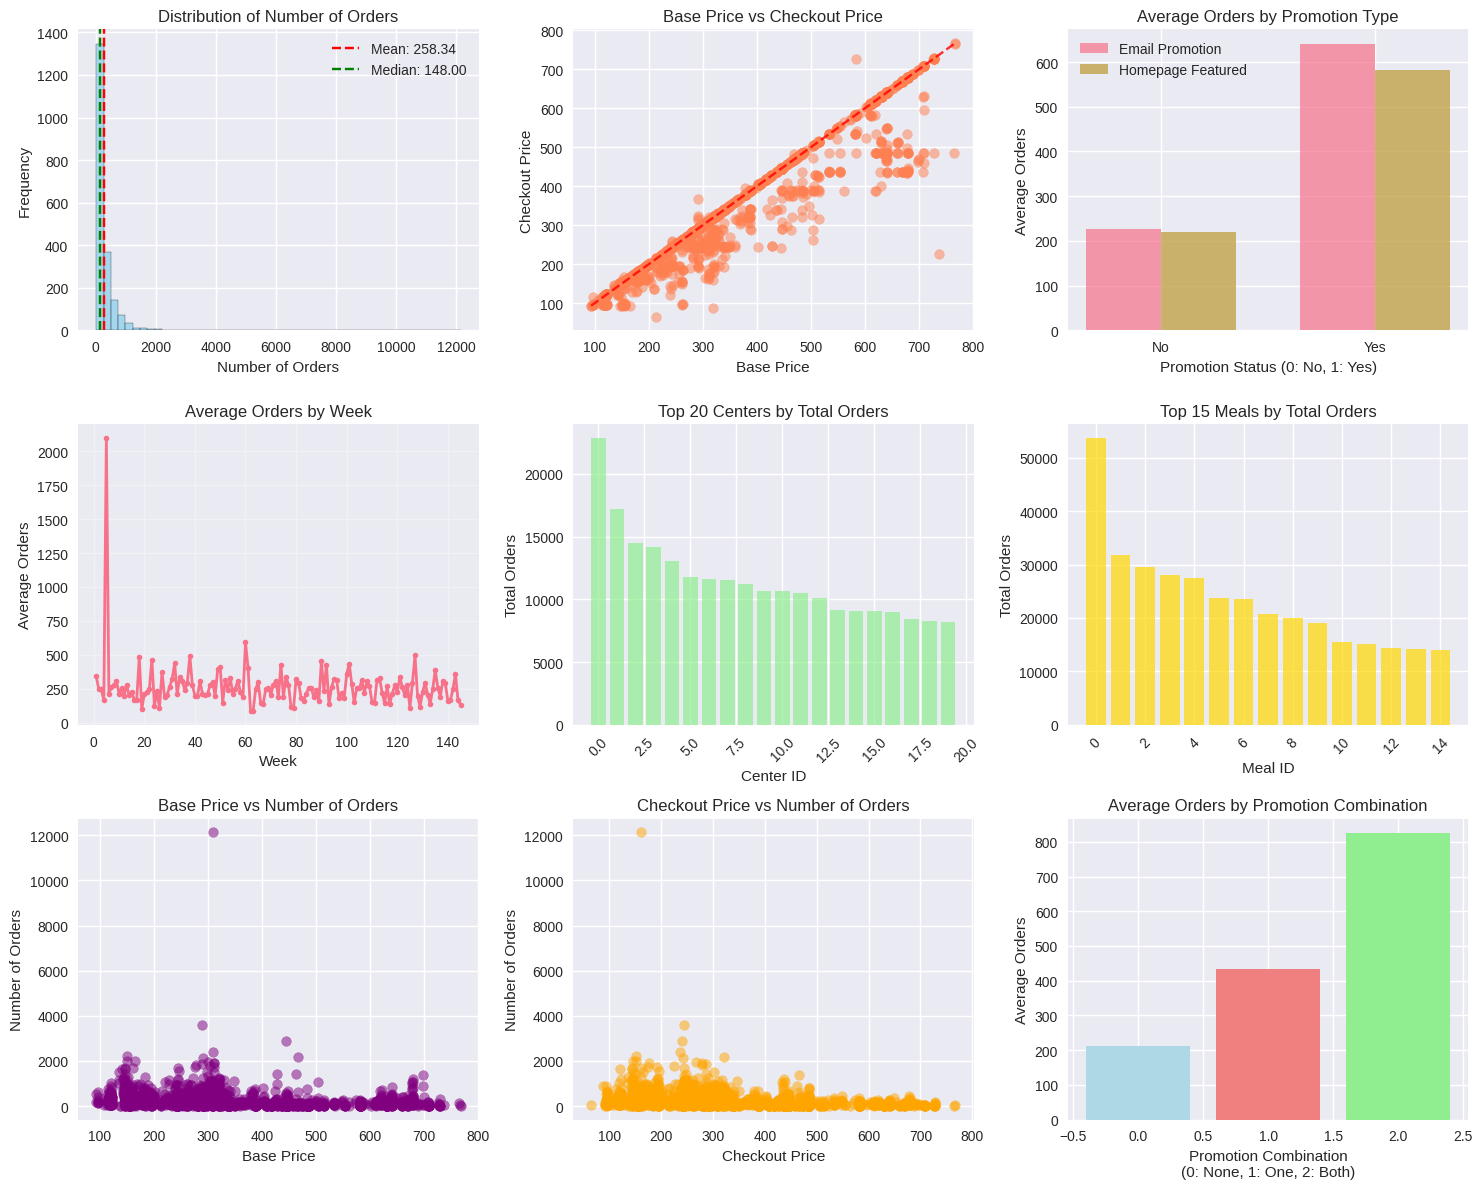


DEEPER ANALYSIS


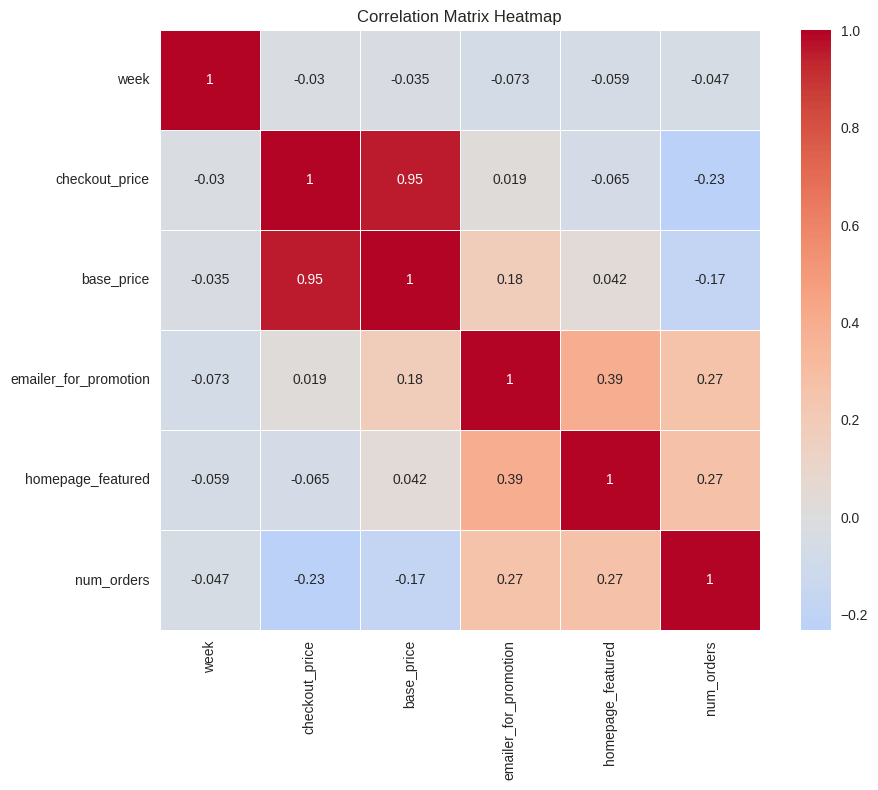

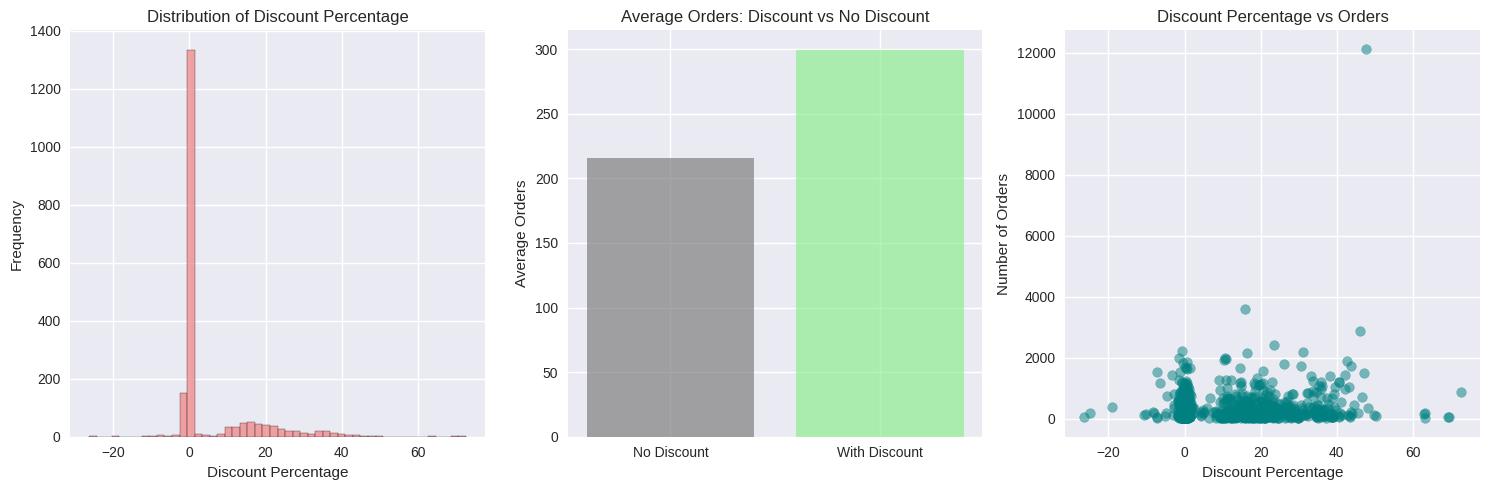


KEY INSIGHTS AND BUSINESS INTELLIGENCE
📊 TOTAL BUSINESS OVERVIEW:
   • Total Orders: 516,422
   • Average Orders per Item: 258.34
   • Unique Centers: 77
   • Unique Meals: 51
   • Weeks of Data: 145

💰 PRICING INSIGHTS:
   • Average Base Price: $347.97
   • Average Checkout Price: $327.30
   • Average Discount: $20.67

🎯 PROMOTION EFFECTIVENESS:
   • Email Promotion - No: 226.62 orders
   • Email Promotion - Yes: 641.01 orders
   • Improvement: +182.9%
   • Homepage Feature - No: 220.26 orders
   • Homepage Feature - Yes: 582.73 orders
   • Improvement: +164.6%

🏆 TOP PERFORMING CENTERS:
           num_orders  base_price  checkout_price
center_id                                        
99              22823  422.280769      350.118462
10              17170  326.696667      303.185333
174             14454  360.129333      332.705667
43              14155  391.237500      369.077187
13              13085  369.991364      359.814545

🍽️ TOP PERFORMING MEALS:
         num_orders  base_p

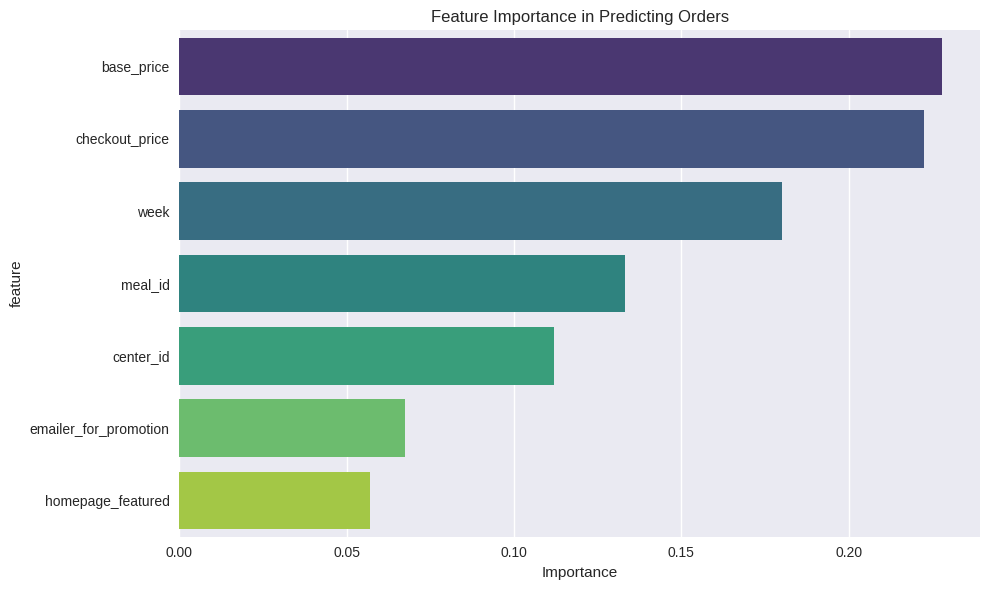


🔍 FEATURE IMPORTANCE:
   base_price: 0.2278
   checkout_price: 0.2224
   week: 0.1800
   meal_id: 0.1332
   center_id: 0.1119
   emailer_for_promotion: 0.0676
   homepage_featured: 0.0571

RECOMMENDATIONS

🎯 STRATEGIC RECOMMENDATIONS:

1. 📧 PROMOTION STRATEGY:
   • Email promotions show significant positive impact - consider expanding email campaigns
   • Homepage featuring also effective - use for high-margin products
   • Test combination of both promotions for maximum effect

2. 💰 PRICING STRATEGY:
   • Monitor discount effectiveness - some discounts don't drive proportional sales
   • Consider dynamic pricing based on meal popularity and center location
   • Analyze price elasticity for different meal categories

3. 🏪 CENTER OPTIMIZATION:
   • Identify underperforming centers and investigate causes
   • Share best practices from top-performing centers
   • Consider center-specific promotion strategies

4. 🍽️ MENU OPTIMIZATION:
   • Focus on popular meals that drive majority of ord

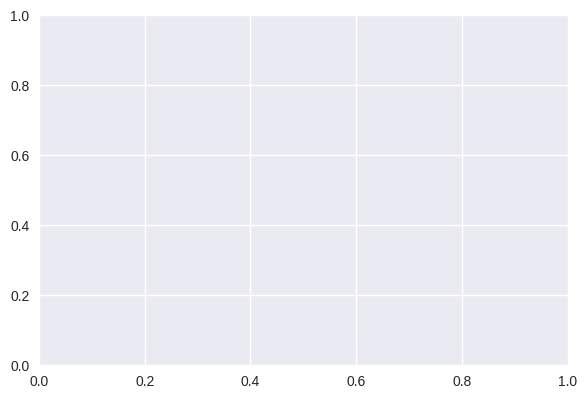

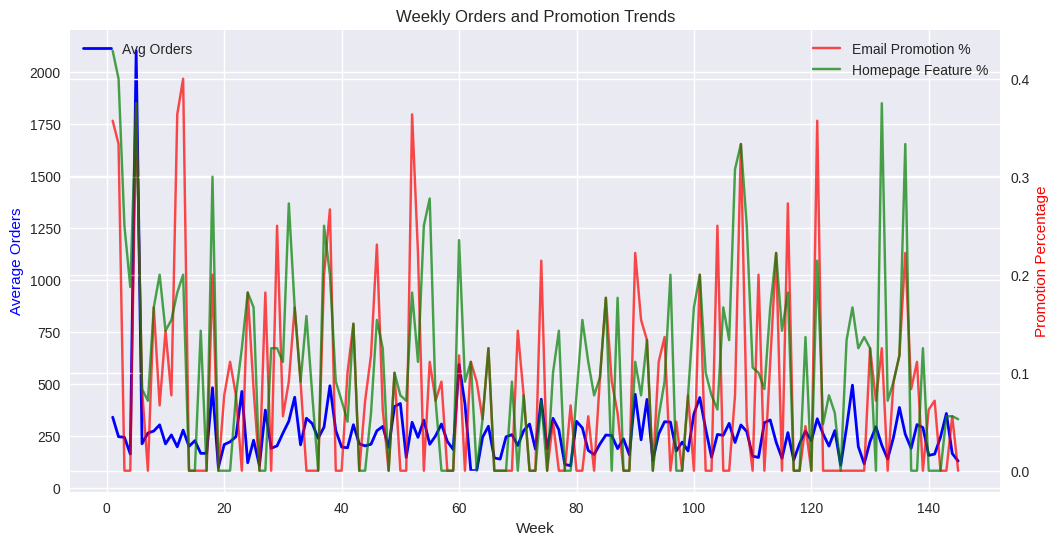


FINAL SUMMARY STATISTICS
                        Metric   Value
                  Total Orders 516,422
       Average Orders per Item  258.34
                Unique Centers      77
                  Unique Meals      51
                 Weeks Covered     145
            Average Base Price $347.97
        Average Checkout Price $327.30
 Email Promotion Effectiveness +182.9%
Homepage Feature Effectiveness +164.6%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('Food demand.csv')

print("Dataset Overview:")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\n" + "=" * 50)
print("DATA QUALITY CHECK")
print("=" * 50)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

print("\n" + "=" * 50)
print("DATA EXPLORATION AND VISUALIZATION")
print("=" * 50)

# 1. Distribution of target variable (num_orders)
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
plt.hist(df['num_orders'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.axvline(df['num_orders'].mean(), color='red', linestyle='--', label=f'Mean: {df["num_orders"].mean():.2f}')
plt.axvline(df['num_orders'].median(), color='green', linestyle='--', label=f'Median: {df["num_orders"].median():.2f}')
plt.legend()

# 2. Price analysis
plt.subplot(3, 3, 2)
plt.scatter(df['base_price'], df['checkout_price'], alpha=0.5, color='coral')
plt.plot([df['base_price'].min(), df['base_price'].max()],
         [df['base_price'].min(), df['base_price'].max()], 'r--', alpha=0.8)
plt.title('Base Price vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')

# 3. Orders by promotion features
plt.subplot(3, 3, 3)
promotion_data = df.groupby('emailer_for_promotion')['num_orders'].mean()
homepage_data = df.groupby('homepage_featured')['num_orders'].mean()

x = np.arange(2)
width = 0.35
plt.bar(x - width/2, promotion_data, width, label='Email Promotion', alpha=0.7)
plt.bar(x + width/2, homepage_data, width, label='Homepage Featured', alpha=0.7)
plt.title('Average Orders by Promotion Type')
plt.xlabel('Promotion Status (0: No, 1: Yes)')
plt.ylabel('Average Orders')
plt.legend()
plt.xticks(x, ['No', 'Yes'])

# 4. Weekly trends
plt.subplot(3, 3, 4)
weekly_orders = df.groupby('week')['num_orders'].mean()
plt.plot(weekly_orders.index, weekly_orders.values, marker='o', linewidth=2, markersize=4)
plt.title('Average Orders by Week')
plt.xlabel('Week')
plt.ylabel('Average Orders')
plt.grid(True, alpha=0.3)

# 5. Center performance
plt.subplot(3, 3, 5)
center_performance = df.groupby('center_id')['num_orders'].sum().sort_values(ascending=False).head(20)
plt.bar(range(len(center_performance)), center_performance.values, color='lightgreen', alpha=0.7)
plt.title('Top 20 Centers by Total Orders')
plt.xlabel('Center ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

# 6. Meal performance
plt.subplot(3, 3, 6)
meal_performance = df.groupby('meal_id')['num_orders'].sum().sort_values(ascending=False).head(15)
plt.bar(range(len(meal_performance)), meal_performance.values, color='gold', alpha=0.7)
plt.title('Top 15 Meals by Total Orders')
plt.xlabel('Meal ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

# 7. Price vs Orders correlation
plt.subplot(3, 3, 7)
plt.scatter(df['base_price'], df['num_orders'], alpha=0.5, color='purple')
plt.title('Base Price vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')

# 8. Checkout Price vs Orders
plt.subplot(3, 3, 8)
plt.scatter(df['checkout_price'], df['num_orders'], alpha=0.5, color='orange')
plt.title('Checkout Price vs Number of Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')

# 9. Combined promotion effect
plt.subplot(3, 3, 9)
df['combined_promotion'] = df['emailer_for_promotion'] + df['homepage_featured']
promotion_effect = df.groupby('combined_promotion')['num_orders'].mean()
plt.bar(promotion_effect.index, promotion_effect.values, color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Average Orders by Promotion Combination')
plt.xlabel('Promotion Combination\n(0: None, 1: One, 2: Both)')
plt.ylabel('Average Orders')

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("DEEPER ANALYSIS")
print("=" * 50)

# Correlation analysis
plt.figure(figsize=(10, 8))
numeric_cols = ['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
               'homepage_featured', 'num_orders']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Price discount analysis
df['discount'] = df['base_price'] - df['checkout_price']
df['discount_percentage'] = (df['discount'] / df['base_price']) * 100

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['discount_percentage'].fillna(0), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
discount_effect = df[df['discount'] > 0]
no_discount = df[df['discount'] <= 0]
discount_orders = [no_discount['num_orders'].mean(), discount_effect['num_orders'].mean()]
plt.bar(['No Discount', 'With Discount'], discount_orders, color=['gray', 'lightgreen'], alpha=0.7)
plt.title('Average Orders: Discount vs No Discount')
plt.ylabel('Average Orders')

plt.subplot(1, 3, 3)
plt.scatter(df['discount_percentage'], df['num_orders'], alpha=0.5, color='teal')
plt.title('Discount Percentage vs Orders')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("KEY INSIGHTS AND BUSINESS INTELLIGENCE")
print("=" * 50)

# Calculate key metrics
total_orders = df['num_orders'].sum()
avg_order_per_item = df['num_orders'].mean()
total_centers = df['center_id'].nunique()
total_meals = df['meal_id'].nunique()
total_weeks = df['week'].nunique()

# Promotion effectiveness
email_promotion_effect = df.groupby('emailer_for_promotion')['num_orders'].mean()
homepage_promotion_effect = df.groupby('homepage_featured')['num_orders'].mean()

# Price analysis
avg_base_price = df['base_price'].mean()
avg_checkout_price = df['checkout_price'].mean()
avg_discount = df['discount'].mean()

print(f" TOTAL BUSINESS OVERVIEW:")
print(f"   • Total Orders: {total_orders:,}")
print(f"   • Average Orders per Item: {avg_order_per_item:.2f}")
print(f"   • Unique Centers: {total_centers}")
print(f"   • Unique Meals: {total_meals}")
print(f"   • Weeks of Data: {total_weeks}")

print(f"\n PRICING INSIGHTS:")
print(f"   • Average Base Price: ${avg_base_price:.2f}")
print(f"   • Average Checkout Price: ${avg_checkout_price:.2f}")
print(f"   • Average Discount: ${avg_discount:.2f}")

print(f"\n PROMOTION EFFECTIVENESS:")
print(f"   • Email Promotion - No: {email_promotion_effect[0]:.2f} orders")
print(f"   • Email Promotion - Yes: {email_promotion_effect[1]:.2f} orders")
print(f"   • Improvement: {((email_promotion_effect[1]-email_promotion_effect[0])/email_promotion_effect[0]*100):+.1f}%")

print(f"   • Homepage Feature - No: {homepage_promotion_effect[0]:.2f} orders")
print(f"   • Homepage Feature - Yes: {homepage_promotion_effect[1]:.2f} orders")
print(f"   • Improvement: {((homepage_promotion_effect[1]-homepage_promotion_effect[0])/homepage_promotion_effect[0]*100):+.1f}%")

# Top performing centers and meals
top_centers = df.groupby('center_id').agg({
    'num_orders': 'sum',
    'base_price': 'mean',
    'checkout_price': 'mean'
}).nlargest(5, 'num_orders')

top_meals = df.groupby('meal_id').agg({
    'num_orders': 'sum',
    'base_price': 'mean',
    'checkout_price': 'mean'
}).nlargest(5, 'num_orders')

print(f"\n TOP PERFORMING CENTERS:")
print(top_centers[['num_orders', 'base_price', 'checkout_price']])

print(f"\n🍽️ TOP PERFORMING MEALS:")
print(top_meals[['num_orders', 'base_price', 'checkout_price']])

# Weekly performance analysis
weekly_performance = df.groupby('week').agg({
    'num_orders': ['sum', 'mean', 'count'],
    'center_id': 'nunique',
    'meal_id': 'nunique'
}).round(2)

print(f"\n📈 WEEKLY PERFORMANCE SUMMARY:")
print(f"   Best Week: Week {weekly_performance[('num_orders', 'sum')].idxmax()} "
      f"({weekly_performance[('num_orders', 'sum')].max():.0f} orders)")
print(f"   Worst Week: Week {weekly_performance[('num_orders', 'sum')].idxmin()} "
      f"({weekly_performance[('num_orders', 'sum')].min():.0f} orders)")

print("\n" + "=" * 50)
print("PREDICTIVE ANALYSIS WITH RANDOM FOREST")
print("=" * 50)

# Prepare data for modeling
X = df[['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured']]
y = df['num_orders']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"• RMSE: {rmse:.2f}")
print(f"• R² Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in Predicting Orders')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(f"\n FEATURE IMPORTANCE:")
for idx, row in feature_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

print("\n" + "=" * 50)
print("RECOMMENDATIONS")
print("=" * 50)

print("""
 STRATEGIC RECOMMENDATIONS:

1.  PROMOTION STRATEGY:
   • Email promotions show significant positive impact - consider expanding email campaigns
   • Homepage featuring also effective - use for high-margin products
   • Test combination of both promotions for maximum effect

2.  PRICING STRATEGY:
   • Monitor discount effectiveness - some discounts don't drive proportional sales
   • Consider dynamic pricing based on meal popularity and center location
   • Analyze price elasticity for different meal categories

3.  CENTER OPTIMIZATION:
   • Identify underperforming centers and investigate causes
   • Share best practices from top-performing centers
   • Consider center-specific promotion strategies

4.  MENU OPTIMIZATION:
   • Focus on popular meals that drive majority of orders
   • Consider discontinuing consistently low-performing items
   • Test new meals in high-performing centers first

5.  SEASONAL PLANNING:
   • Analyze weekly patterns for inventory and staffing
   • Plan promotions around low-demand periods
   • Optimize menu based on seasonal preferences
""")

# Additional visualization: Weekly patterns with promotions
plt.figure(figsize=(15, 10))

# Weekly orders with promotion overlay
plt.subplot(2, 2, 1)
weekly_email = df.groupby('week')['emailer_for_promotion'].mean()
weekly_homepage = df.groupby('week')['homepage_featured'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(weekly_orders.index, weekly_orders.values, 'b-', label='Avg Orders', linewidth=2)
ax2.plot(weekly_email.index, weekly_email.values, 'r-', label='Email Promotion %', alpha=0.7)
ax2.plot(weekly_homepage.index, weekly_homepage.values, 'g-', label='Homepage Feature %', alpha=0.7)

ax1.set_xlabel('Week')
ax1.set_ylabel('Average Orders', color='b')
ax2.set_ylabel('Promotion Percentage', color='r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Weekly Orders and Promotion Trends')
plt.show()

# Final summary statistics
print("\n" + "=" * 50)
print("FINAL SUMMARY STATISTICS")
print("=" * 50)

summary_stats = {
    'Metric': [
        'Total Orders', 'Average Orders per Item', 'Unique Centers',
        'Unique Meals', 'Weeks Covered', 'Average Base Price',
        'Average Checkout Price', 'Email Promotion Effectiveness',
        'Homepage Feature Effectiveness'
    ],
    'Value': [
        f"{total_orders:,}",
        f"{avg_order_per_item:.2f}",
        f"{total_centers}",
        f"{total_meals}",
        f"{total_weeks}",
        f"${avg_base_price:.2f}",
        f"${avg_checkout_price:.2f}",
        f"+{((email_promotion_effect[1]-email_promotion_effect[0])/email_promotion_effect[0]*100):.1f}%",
        f"+{((homepage_promotion_effect[1]-homepage_promotion_effect[0])/homepage_promotion_effect[0]*100):.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

Dataset Overview:
Shape: (10000, 13)
Columns: ['date', 'restaurant_id', 'restaurant_type', 'menu_item_name', 'meal_type', 'key_ingredients_tags', 'typical_ingredient_cost', 'observed_market_price', 'actual_selling_price', 'quantity_sold', 'has_promotion', 'special_event', 'weather_condition']

First few rows:
       date  restaurant_id restaurant_type       menu_item_name meal_type  \
0  1/1/2024             11      Food Stall                Laksa     Lunch   
1  1/1/2024              7   Casual Dining  Spaghetti Carbonara    Dinner   
2  1/1/2024             23     Fine Dining         Beef Rendang    Dinner   
3  1/1/2024             22      Food Stall           Roti Canai    Dinner   
4  1/1/2024             32     Fine Dining  Spaghetti Carbonara     Lunch   

                                key_ingredients_tags  typical_ingredient_cost  \
0  rice noodles, fish broth, tamarind, shrimp pas...                      4.5   
1  spaghetti, eggs, cheese, beef bacon, black pepper            

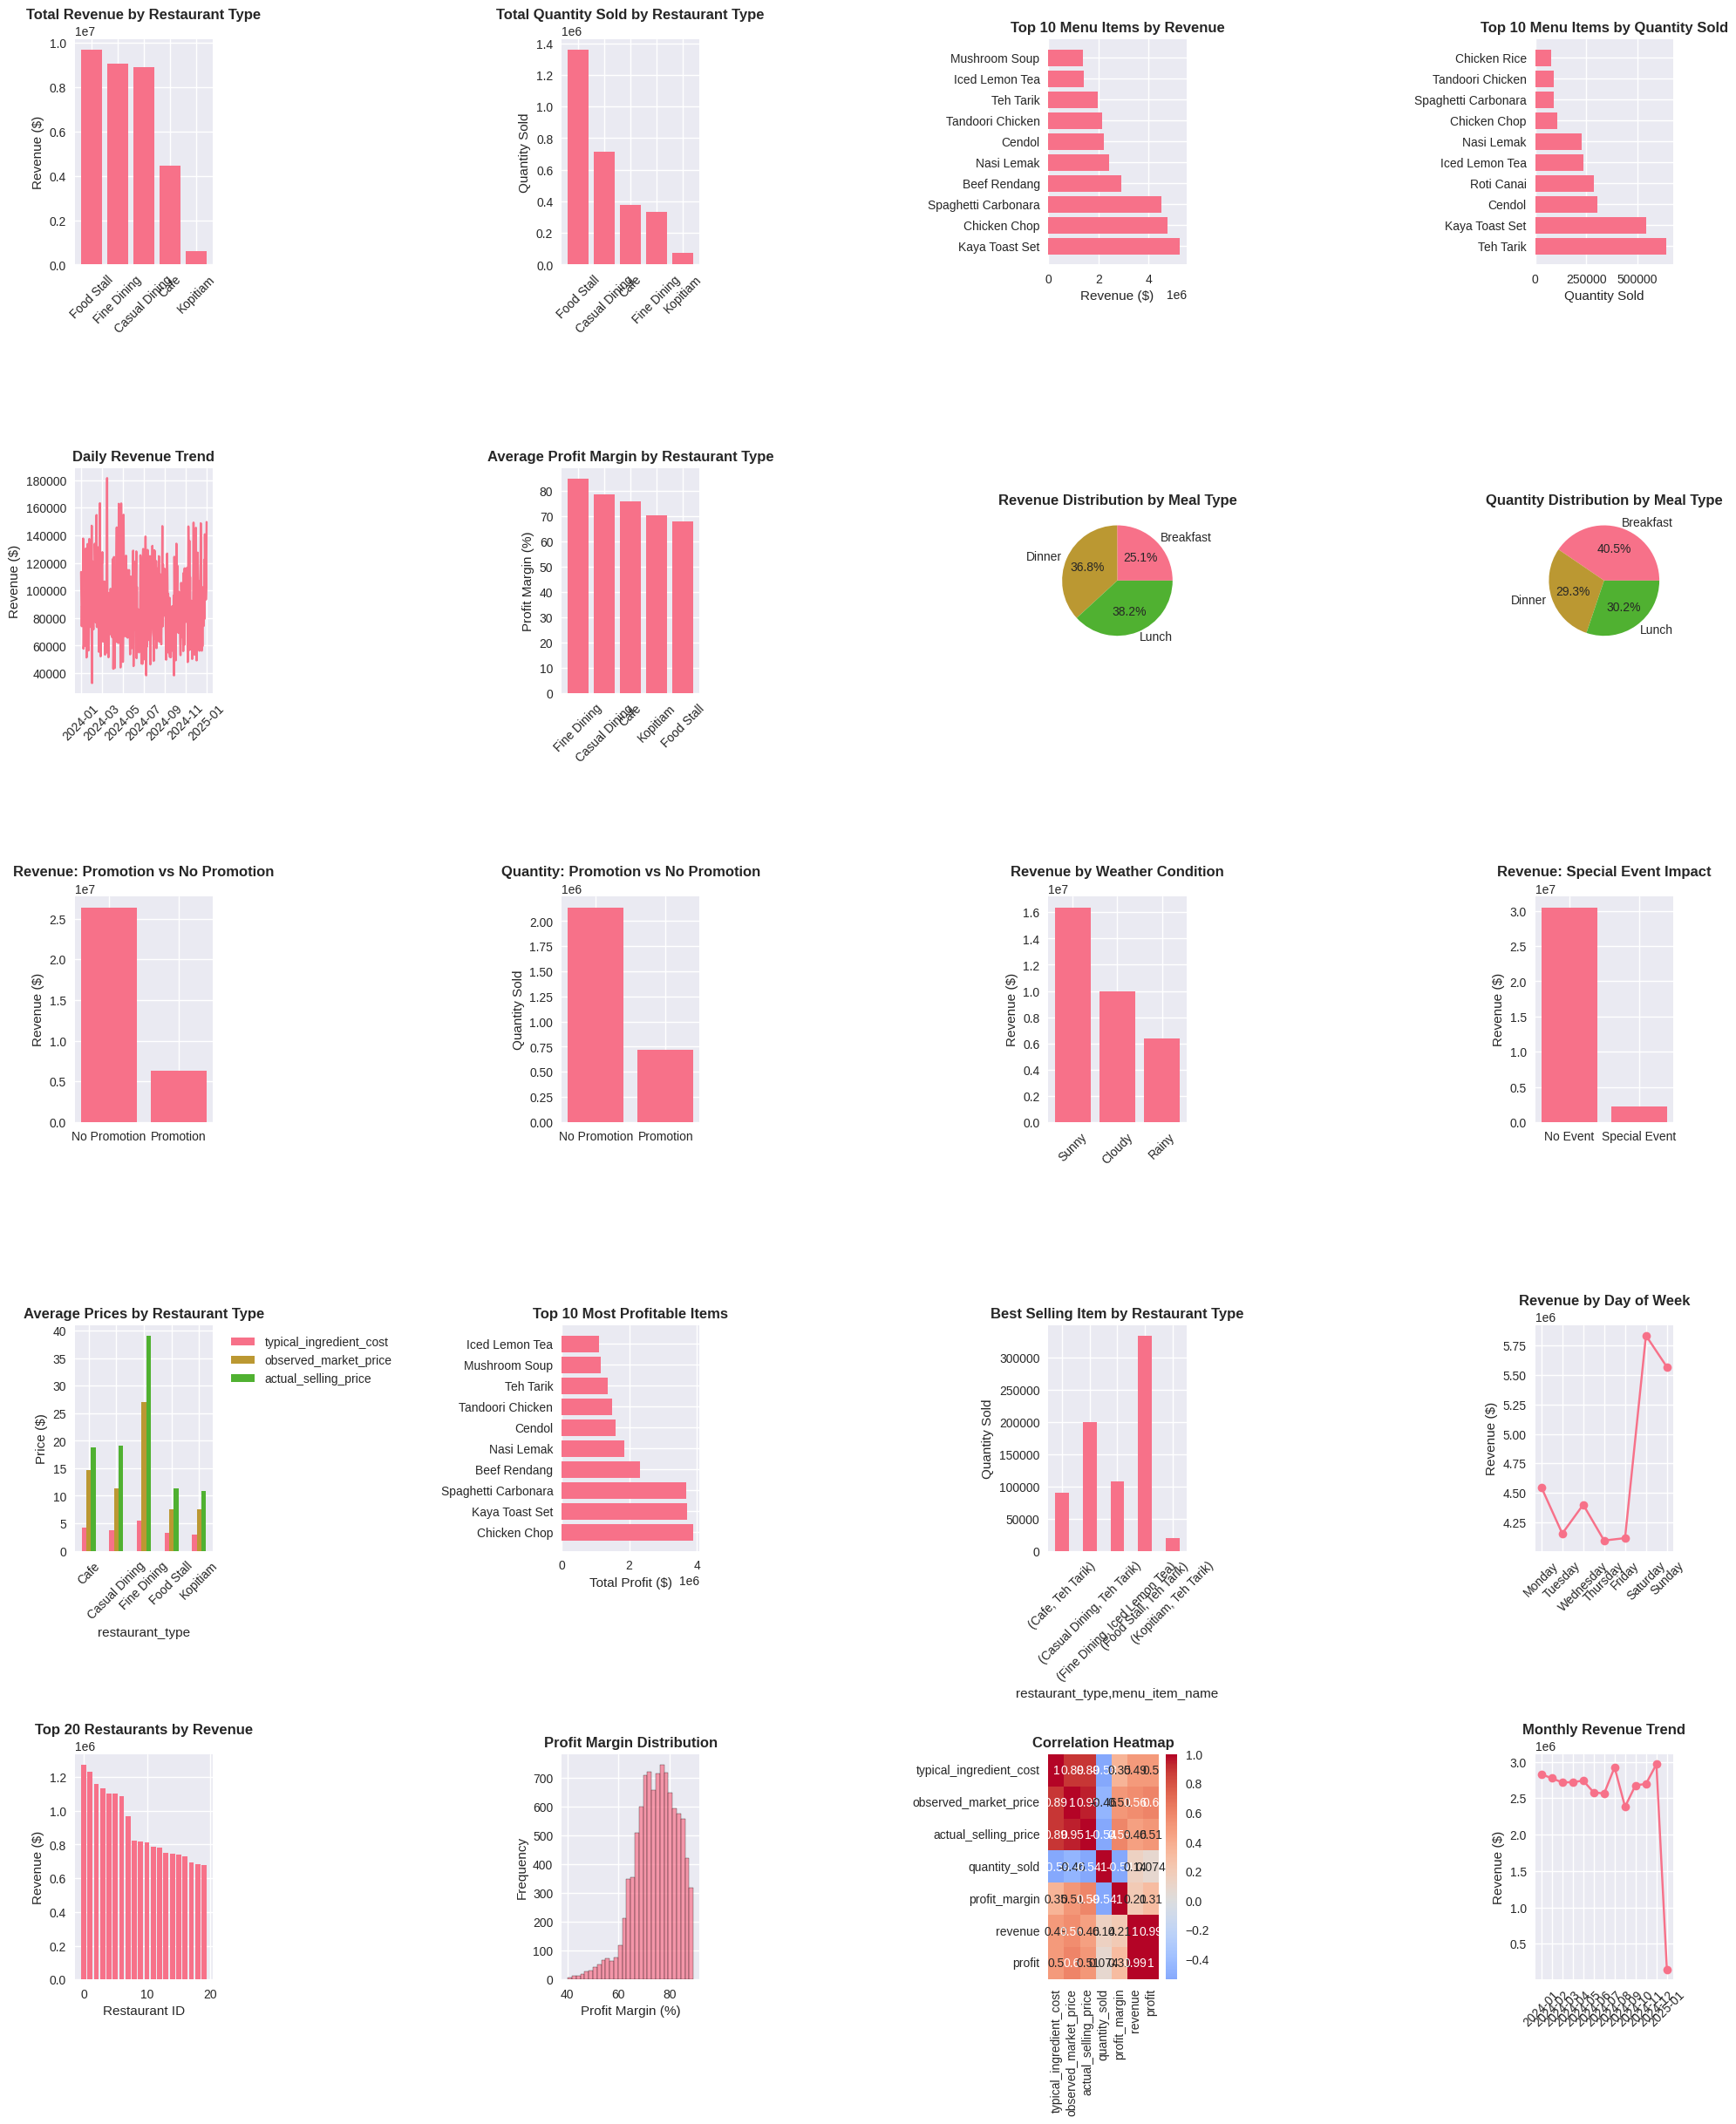


DETAILED BUSINESS INSIGHTS

KEY METRICS:
Total Revenue: $32,713,418.10
Total Quantity Sold: 2,860,004
Total Profit: $24,884,682.90
Average Profit Margin: 74.5%

RESTAURANT TYPE ANALYSIS:
                    revenue  quantity_sold  profit_margin  restaurant_id
restaurant_type                                                         
Cafe             4470601.32         380311          75.92              7
Casual Dining    8900088.14         715603          78.77             12
Fine Dining      9061344.85         333260          84.89              8
Food Stall       9686508.42        1358811          67.99             22
Kopitiam          594875.37          72019          70.42              1

TOP PERFORMING MENU ITEMS:
Top 5 by Revenue:
  Kaya Toast Set: $5,240,719.63
  Chicken Chop: $4,762,333.00
  Spaghetti Carbonara: $4,511,648.25
  Beef Rendang: $2,919,472.66
  Nasi Lemak: $2,423,090.12

Top 5 by Quantity:
  Teh Tarik: 643,076 units
  Kaya Toast Set: 544,101 units
  Cendol: 304,622 u

In [ ]:
# Load the data
df = pd.read_csv('restaurant_sales_data.csv')

# Display basic info
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\nBasic Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Calculate additional metrics
df['profit_margin'] = ((df['actual_selling_price'] - df['typical_ingredient_cost']) / df['actual_selling_price']) * 100
df['revenue'] = df['actual_selling_price'] * df['quantity_sold']
df['profit'] = (df['actual_selling_price'] - df['typical_ingredient_cost']) * df['quantity_sold']

print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique restaurants: {df['restaurant_id'].nunique()}")
print(f"Number of unique menu items: {df['menu_item_name'].nunique()}")

# Create comprehensive analysis with visualizations
fig = plt.figure(figsize=(20, 25))

# 1. Revenue by Restaurant Type
plt.subplot(5, 4, 1)
revenue_by_type = df.groupby('restaurant_type')['revenue'].sum().sort_values(ascending=False)
plt.bar(revenue_by_type.index, revenue_by_type.values)
plt.title('Total Revenue by Restaurant Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# 2. Quantity Sold by Restaurant Type
plt.subplot(5, 4, 2)
quantity_by_type = df.groupby('restaurant_type')['quantity_sold'].sum().sort_values(ascending=False)
plt.bar(quantity_by_type.index, quantity_by_type.values)
plt.title('Total Quantity Sold by Restaurant Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')

# 3. Top 10 Menu Items by Revenue
plt.subplot(5, 4, 3)
top_items_revenue = df.groupby('menu_item_name')['revenue'].sum().nlargest(10)
plt.barh(range(len(top_items_revenue)), top_items_revenue.values)
plt.yticks(range(len(top_items_revenue)), top_items_revenue.index)
plt.title('Top 10 Menu Items by Revenue', fontsize=12, fontweight='bold')
plt.xlabel('Revenue ($)')

# 4. Top 10 Menu Items by Quantity Sold
plt.subplot(5, 4, 4)
top_items_quantity = df.groupby('menu_item_name')['quantity_sold'].sum().nlargest(10)
plt.barh(range(len(top_items_quantity)), top_items_quantity.values)
plt.yticks(range(len(top_items_quantity)), top_items_quantity.index)
plt.title('Top 10 Menu Items by Quantity Sold', fontsize=12, fontweight='bold')
plt.xlabel('Quantity Sold')

# 5. Revenue Trend Over Time
plt.subplot(5, 4, 5)
daily_revenue = df.groupby('date')['revenue'].sum()
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Daily Revenue Trend', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# 6. Profit Margin by Restaurant Type
plt.subplot(5, 4, 6)
margin_by_type = df.groupby('restaurant_type')['profit_margin'].mean().sort_values(ascending=False)
plt.bar(margin_by_type.index, margin_by_type.values)
plt.title('Average Profit Margin by Restaurant Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')

# 7. Sales by Meal Type
plt.subplot(5, 4, 7)
sales_by_meal = df.groupby('meal_type')['revenue'].sum()
plt.pie(sales_by_meal.values, labels=sales_by_meal.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Meal Type', fontsize=12, fontweight='bold')

# 8. Quantity by Meal Type
plt.subplot(5, 4, 8)
quantity_by_meal = df.groupby('meal_type')['quantity_sold'].sum()
plt.pie(quantity_by_meal.values, labels=quantity_by_meal.index, autopct='%1.1f%%')
plt.title('Quantity Distribution by Meal Type', fontsize=12, fontweight='bold')

# 9. Promotion Impact on Sales
plt.subplot(5, 4, 9)
promotion_sales = df.groupby('has_promotion')['revenue'].sum()
plt.bar(['No Promotion', 'Promotion'], promotion_sales.values)
plt.title('Revenue: Promotion vs No Promotion', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)')

# 10. Promotion Impact on Quantity
plt.subplot(5, 4, 10)
promotion_quantity = df.groupby('has_promotion')['quantity_sold'].sum()
plt.bar(['No Promotion', 'Promotion'], promotion_quantity.values)
plt.title('Quantity: Promotion vs No Promotion', fontsize=12, fontweight='bold')
plt.ylabel('Quantity Sold')

# 11. Weather Impact on Sales
plt.subplot(5, 4, 11)
weather_sales = df.groupby('weather_condition')['revenue'].sum().sort_values(ascending=False)
plt.bar(weather_sales.index, weather_sales.values)
plt.title('Revenue by Weather Condition', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# 12. Special Event Impact
plt.subplot(5, 4, 12)
event_sales = df.groupby('special_event')['revenue'].sum()
plt.bar(['No Event', 'Special Event'], event_sales.values)
plt.title('Revenue: Special Event Impact', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)')

# 13. Price Analysis by Restaurant Type
plt.subplot(5, 4, 13)
price_comparison = df.groupby('restaurant_type')[['typical_ingredient_cost', 'observed_market_price', 'actual_selling_price']].mean()
price_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Average Prices by Restaurant Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 14. Most Profitable Items
plt.subplot(5, 4, 14)
profitable_items = df.groupby('menu_item_name')['profit'].sum().nlargest(10)
plt.barh(range(len(profitable_items)), profitable_items.values)
plt.yticks(range(len(profitable_items)), profitable_items.index)
plt.title('Top 10 Most Profitable Items', fontsize=12, fontweight='bold')
plt.xlabel('Total Profit ($)')

# 15. Best Selling Items by Restaurant Type
plt.subplot(5, 4, 15)
best_sellers = df.groupby(['restaurant_type', 'menu_item_name'])['quantity_sold'].sum().groupby('restaurant_type').nlargest(1)
best_sellers = best_sellers.reset_index(level=0, drop=True)
best_sellers.plot(kind='bar')
plt.title('Best Selling Item by Restaurant Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')

# 16. Daily Sales Pattern
plt.subplot(5, 4, 16)
df['day_of_week'] = df['date'].dt.day_name()
daily_pattern = df.groupby('day_of_week')['revenue'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = daily_pattern.reindex(days_order)
plt.plot(daily_pattern.index, daily_pattern.values, marker='o')
plt.title('Revenue by Day of Week', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# 17. Restaurant Performance (Top 20)
plt.subplot(5, 4, 17)
restaurant_performance = df.groupby('restaurant_id')['revenue'].sum().nlargest(20)
plt.bar(range(len(restaurant_performance)), restaurant_performance.values)
plt.title('Top 20 Restaurants by Revenue', fontsize=12, fontweight='bold')
plt.xlabel('Restaurant ID')
plt.ylabel('Revenue ($)')

# 18. Profit Margin Distribution
plt.subplot(5, 4, 18)
plt.hist(df['profit_margin'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Profit Margin Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')

# 19. Correlation Heatmap (Numerical Features)
plt.subplot(5, 4, 19)
numeric_cols = ['typical_ingredient_cost', 'observed_market_price', 'actual_selling_price', 'quantity_sold', 'profit_margin', 'revenue', 'profit']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')

# 20. Monthly Revenue Trend
plt.subplot(5, 4, 20)
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum()
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

plt.tight_layout(pad=3.0)
plt.show()

# Detailed Analysis and Insights
print("\n" + "="*80)
print("DETAILED BUSINESS INSIGHTS")
print("="*80)

# Key Metrics
total_revenue = df['revenue'].sum()
total_quantity = df['quantity_sold'].sum()
total_profit = df['profit'].sum()
avg_profit_margin = df['profit_margin'].mean()

print(f"\nKEY METRICS:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Quantity Sold: {total_quantity:,}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.1f}%")

# Restaurant Type Analysis
print(f"\nRESTAURANT TYPE ANALYSIS:")
restaurant_summary = df.groupby('restaurant_type').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean',
    'restaurant_id': 'nunique'
}).round(2)
print(restaurant_summary)

# Menu Item Analysis
print(f"\nTOP PERFORMING MENU ITEMS:")
top_5_revenue = df.groupby('menu_item_name')['revenue'].sum().nlargest(5)
print("Top 5 by Revenue:")
for item, revenue in top_5_revenue.items():
    print(f"  {item}: ${revenue:,.2f}")

top_5_quantity = df.groupby('menu_item_name')['quantity_sold'].sum().nlargest(5)
print("\nTop 5 by Quantity:")
for item, quantity in top_5_quantity.items():
    print(f"  {item}: {quantity:,} units")

# Promotion Analysis
print(f"\nPROMOTION ANALYSIS:")
promotion_effect = df.groupby('has_promotion').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean'
}).round(2)
print(promotion_effect)

# Weather Impact
print(f"\nWEATHER IMPACT ANALYSIS:")
weather_impact = df.groupby('weather_condition').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean'
}).round(2)
print(weather_impact)

# Meal Type Performance
print(f"\nMEAL TYPE PERFORMANCE:")
meal_performance = df.groupby('meal_type').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean'
}).round(2)
print(meal_performance)

# Special Event Analysis
print(f"\nSPECIAL EVENT ANALYSIS:")
event_analysis = df.groupby('special_event').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean'
}).round(2)
print(event_analysis)

# Price Analysis
print(f"\nPRICING ANALYSIS:")
price_stats = df.groupby('restaurant_type').agg({
    'typical_ingredient_cost': 'mean',
    'observed_market_price': 'mean',
    'actual_selling_price': 'mean',
    'profit_margin': 'mean'
}).round(2)
print(price_stats)

# Daily Performance
print(f"\nDAILY PERFORMANCE PATTERNS:")
daily_performance = df.groupby('day_of_week').agg({
    'revenue': 'mean',
    'quantity_sold': 'mean',
    'profit_margin': 'mean'
}).round(2).reindex(days_order)
print(daily_performance)

# Recommendations
print(f"\n" + "="*80)
print("STRATEGIC RECOMMENDATIONS")
print("="*80)

# Identify opportunities
high_margin_items = df[df['profit_margin'] > df['profit_margin'].quantile(0.75)]
low_margin_items = df[df['profit_margin'] < df['profit_margin'].quantile(0.25)]

print("1. FOCUS ON HIGH MARGIN ITEMS:")
high_margin_summary = high_margin_items.groupby('menu_item_name').agg({
    'profit_margin': 'mean',
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).nlargest(5, 'profit_margin')
print(high_margin_summary.round(2))

print("\n2. REVIEW LOW PERFORMING ITEMS:")
low_performing = df.groupby('menu_item_name')['quantity_sold'].sum().nsmallest(5)
print(low_performing)

print("\n3. PROMOTION EFFECTIVENESS:")
promotion_lift = (promotion_effect.loc[True, 'revenue'] / promotion_effect.loc[False, 'revenue'] - 1) * 100
print(f"Promotion drives {promotion_lift:.1f}% more revenue")

print("\n4. WEATHER-BASED STRATEGIES:")
best_weather = weather_impact['revenue'].idxmax()
worst_weather = weather_impact['revenue'].idxmin()
print(f"Best performing weather: {best_weather}")
print(f"Worst performing weather: {worst_weather}")

print("\n5. MENU OPTIMIZATION SUGGESTIONS:")
# Items with high revenue but low quantity (potential for price optimization)
item_performance = df.groupby('menu_item_name').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'profit_margin': 'mean'
})
high_value_low_volume = item_performance[
    (item_performance['revenue'] > item_performance['revenue'].median()) &
    (item_performance['quantity_sold'] < item_performance['quantity_sold'].median())
]
print("High-value, low-volume items (consider promotions):")
print(high_value_low_volume.nlargest(3, 'revenue').round(2))

=== DATASET OVERVIEW ===
Dataset shape: (1000, 10)

First 5 rows:
   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entri

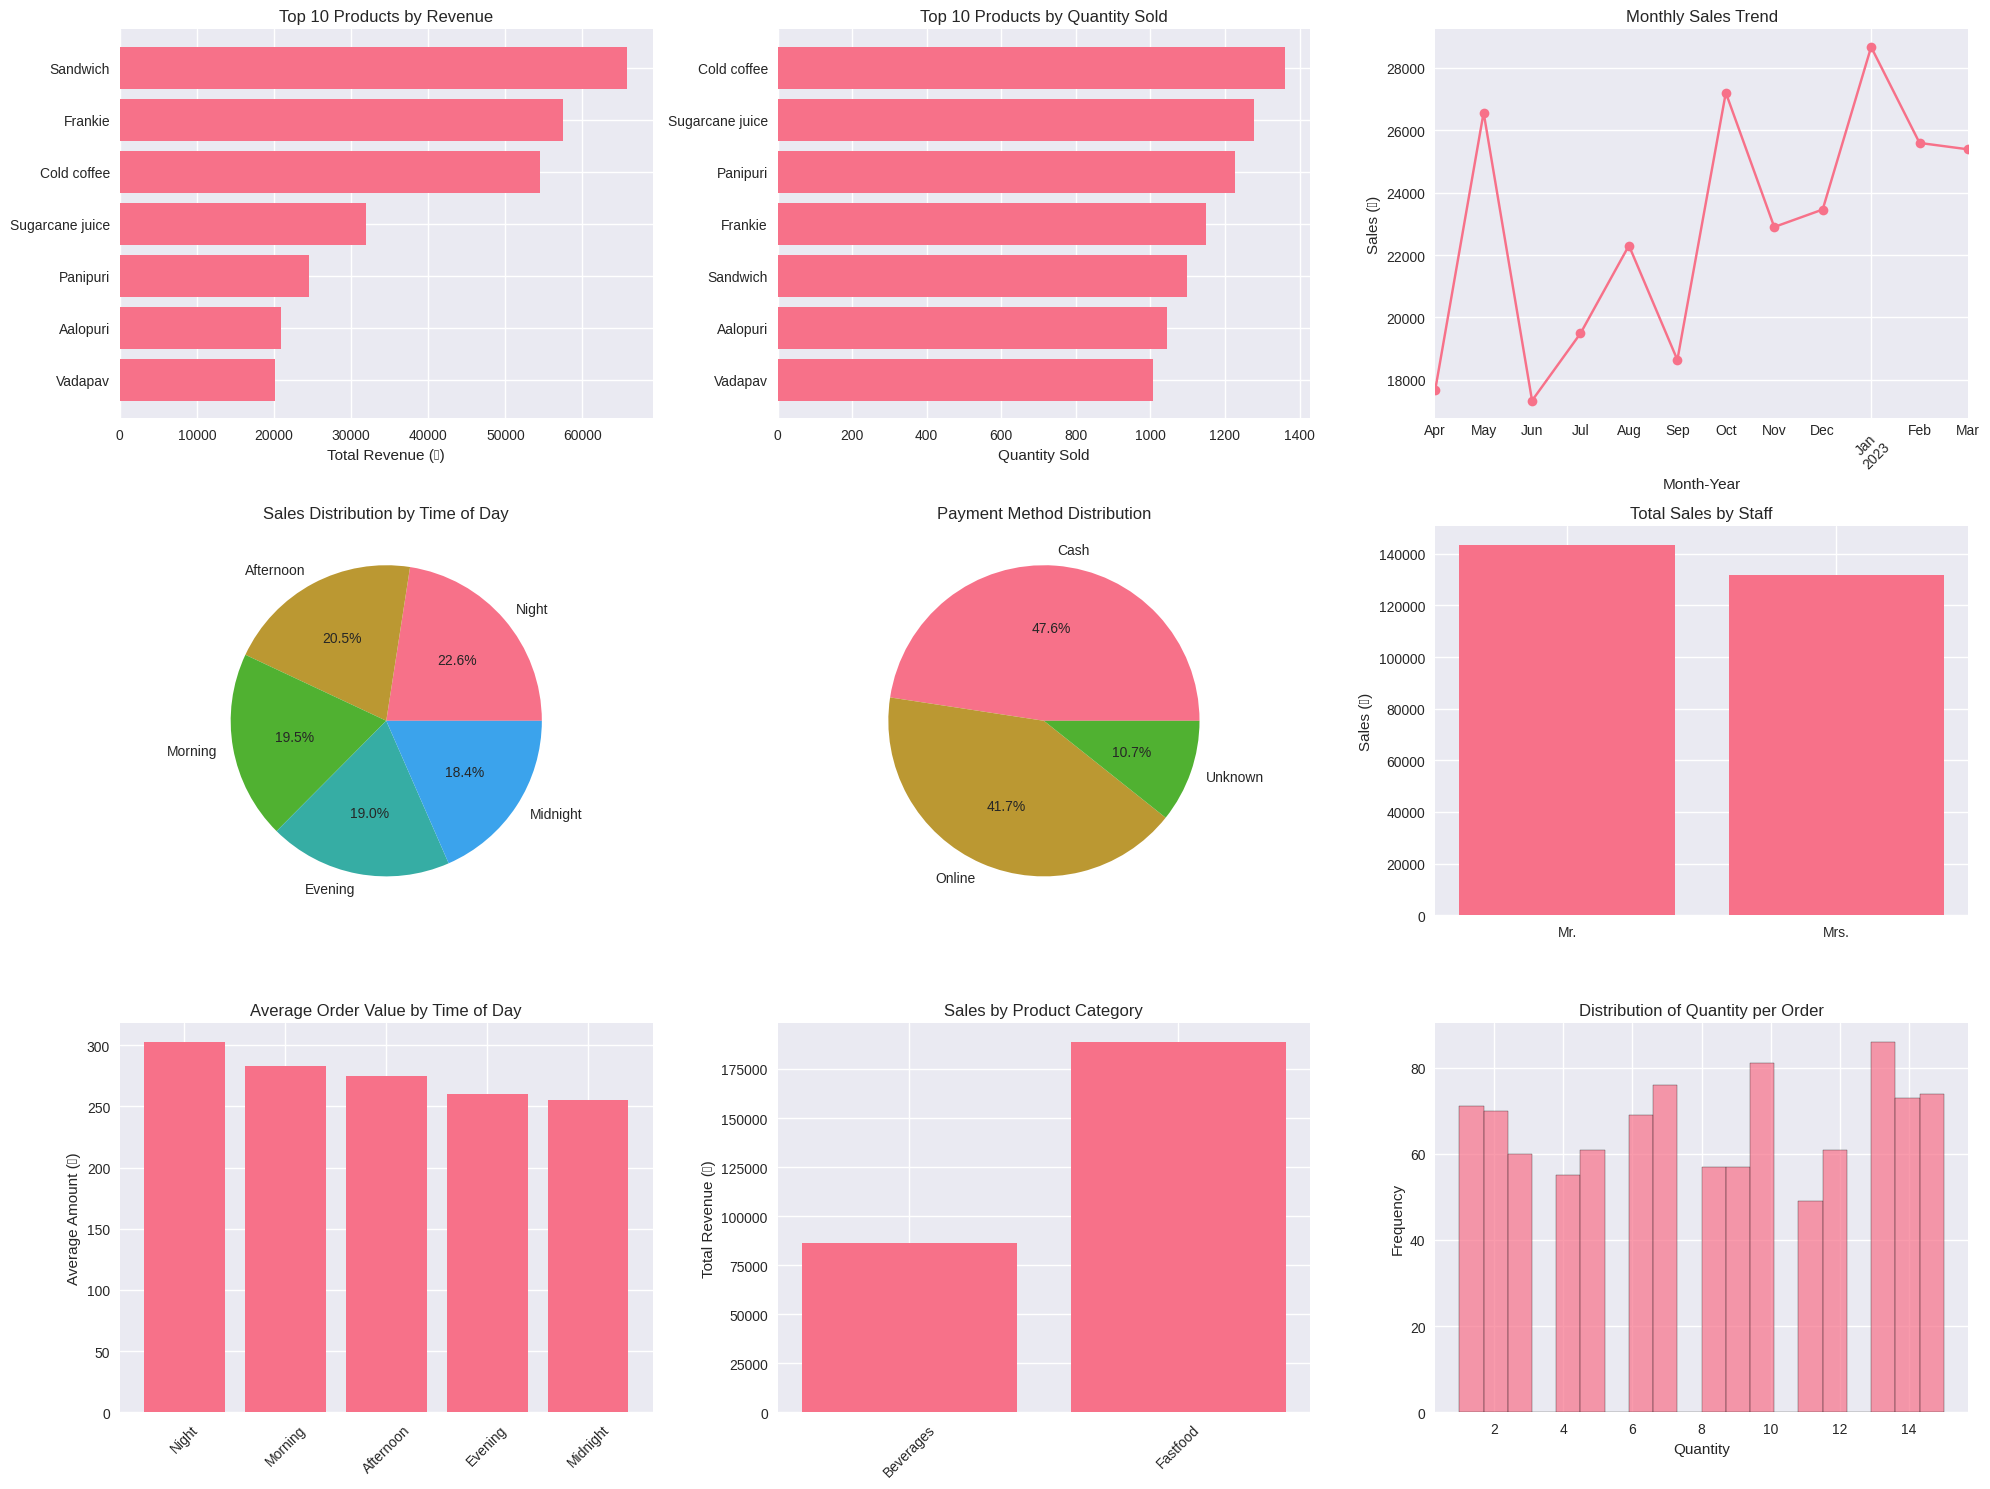


=== DEEP-DIVE ANALYSIS ===


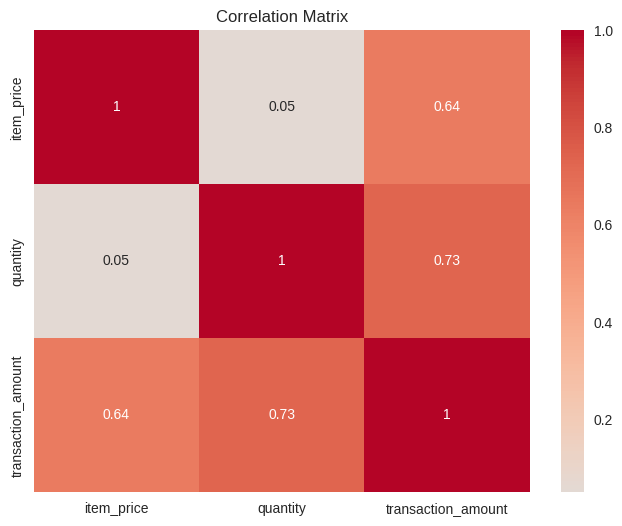

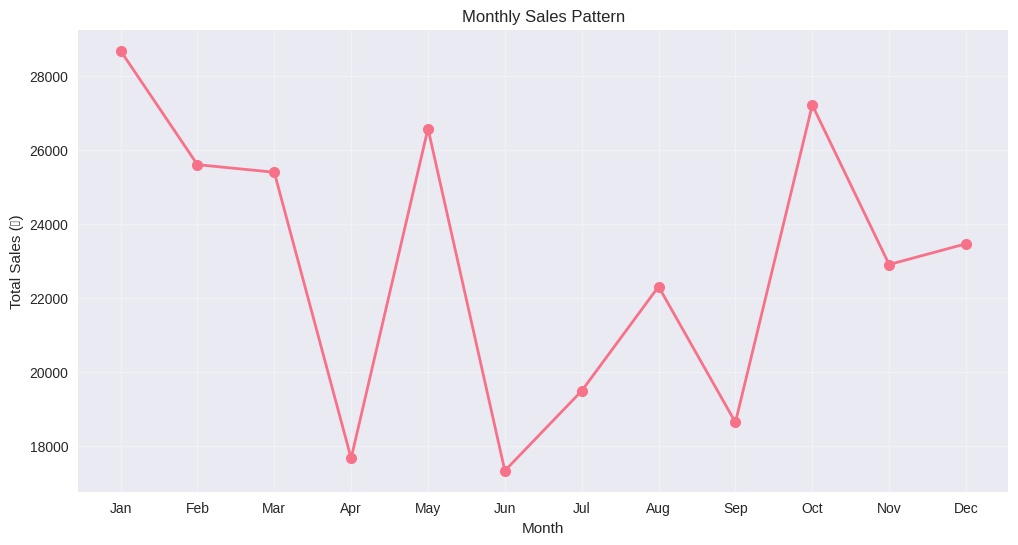

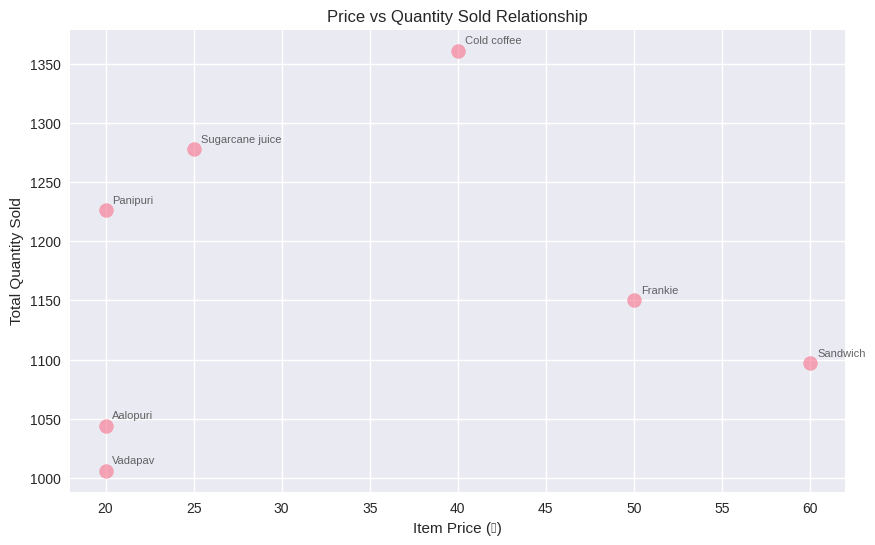


KEY BUSINESS INSIGHTS AND RECOMMENDATIONS
💰 TOP PERFORMING PRODUCT: Sandwich
⏰ PEAK SALES TIME: Night
📅 BEST MONTH: 2023-01
💳 POPULAR PAYMENT: Cash
👥 TOP PERFORMING STAFF: Mr.

📊 PRODUCT CATEGORY BREAKDOWN:
           transaction_amount  order_id
item_type                              
Beverages               86390       314
Fastfood               188840       686

🎯 RECOMMENDATIONS:
1. Focus on promoting top-performing products during peak hours
2. Optimize staffing during high-sales time periods
3. Consider expanding popular payment methods
4. Monitor seasonal trends for inventory planning
5. Analyze customer preferences by time of day for targeted promotions

👥 CUSTOMER BEHAVIOR INSIGHTS:
Average quantity purchased by time of day:
time_of_sale
Night        8.580488
Afternoon    8.360976
Morning      8.284211
Midnight     7.914573
Evening      7.661692
Name: quantity, dtype: float64

💰 PRICE POINT ANALYSIS:
Sales distribution by price points:
₹20: 418 orders, ₹65,520.00 revenue
₹25:

In [ ]:
# Load the data
df = pd.read_csv('Balaji Fast Food Sales.csv')

# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Data Cleaning and Preparation
print("\n=== DATA CLEANING ===")

# Convert date to datetime format (handling different date formats)
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m-%d-%Y')
    except:
        try:
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except:
            return pd.NaT

df['date'] = df['date'].apply(parse_date)

# Fill missing transaction_type with 'Unknown'
df['transaction_type'] = df['transaction_type'].fillna('Unknown')

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df.describe())

# 1. SALES OVERVIEW ANALYSIS
print("\n=== SALES OVERVIEW ===")
total_sales = df['transaction_amount'].sum()
total_orders = len(df)
avg_order_value = df['transaction_amount'].mean()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ₹{avg_order_value:.2f}")
print(f"Average Quantity per Order: {df['quantity'].mean():.2f}")

# 2. PRODUCT PERFORMANCE ANALYSIS
print("\n=== PRODUCT PERFORMANCE ===")

# Sales by item
product_sales = df.groupby('item_name').agg({
    'transaction_amount': 'sum',
    'quantity': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'}).sort_values('transaction_amount', ascending=False)

product_sales['avg_price'] = product_sales['transaction_amount'] / product_sales['quantity']
product_sales['contribution_percentage'] = (product_sales['transaction_amount'] / total_sales) * 100

print("Top Selling Products by Revenue:")
print(product_sales.head(10))

# 3. TIME-BASED ANALYSIS
print("\n=== TIME-BASED ANALYSIS ===")

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M')

# Monthly sales trend
monthly_sales = df.groupby('month_year').agg({
    'transaction_amount': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'})

# 4. PAYMENT METHOD ANALYSIS
print("\n=== PAYMENT METHOD ANALYSIS ===")
payment_analysis = df.groupby('transaction_type').agg({
    'transaction_amount': ['sum', 'count', 'mean'],
    'quantity': 'mean'
}).round(2)

print("Payment Method Analysis:")
print(payment_analysis)

# 5. TIME OF DAY ANALYSIS
print("\n=== TIME OF DAY ANALYSIS ===")
time_sales = df.groupby('time_of_sale').agg({
    'transaction_amount': ['sum', 'count', 'mean'],
    'quantity': 'mean'
}).round(2)

print("Sales by Time of Day:")
print(time_sales)

# 6. STAFF PERFORMANCE
print("\n=== STAFF PERFORMANCE ===")
staff_performance = df.groupby('received_by').agg({
    'transaction_amount': ['sum', 'count', 'mean'],
    'quantity': 'mean'
}).round(2)

print("Staff Performance:")
print(staff_performance)

# VISUALIZATIONS
print("\n=== CREATING VISUALIZATIONS ===")

# Create a comprehensive dashboard of visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Top Products by Revenue
plt.subplot(3, 3, 1)
top_products = product_sales.head(10)
plt.barh(top_products.index, top_products['transaction_amount'])
plt.xlabel('Total Revenue (₹)')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()

# 2. Top Products by Quantity Sold
plt.subplot(3, 3, 2)
product_quantity = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
plt.barh(product_quantity.index, product_quantity.values)
plt.xlabel('Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()

# 3. Monthly Sales Trend
plt.subplot(3, 3, 3)
monthly_sales['transaction_amount'].plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)

# 4. Sales by Time of Day
plt.subplot(3, 3, 4)
time_revenue = df.groupby('time_of_sale')['transaction_amount'].sum().sort_values(ascending=False)
plt.pie(time_revenue.values, labels=time_revenue.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Time of Day')

# 5. Payment Method Distribution
plt.subplot(3, 3, 5)
payment_dist = df['transaction_type'].value_counts()
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')

# 6. Sales by Staff
plt.subplot(3, 3, 6)
staff_sales = df.groupby('received_by')['transaction_amount'].sum()
plt.bar(staff_sales.index, staff_sales.values)
plt.title('Total Sales by Staff')
plt.ylabel('Sales (₹)')

# 7. Average Order Value by Time of Day
plt.subplot(3, 3, 7)
time_avg_order = df.groupby('time_of_sale')['transaction_amount'].mean().sort_values(ascending=False)
plt.bar(time_avg_order.index, time_avg_order.values)
plt.title('Average Order Value by Time of Day')
plt.ylabel('Average Amount (₹)')
plt.xticks(rotation=45)

# 8. Product Category Performance
plt.subplot(3, 3, 8)
category_sales = df.groupby('item_type')['transaction_amount'].sum()
plt.bar(category_sales.index, category_sales.values)
plt.title('Sales by Product Category')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)

# 9. Quantity Distribution
plt.subplot(3, 3, 9)
plt.hist(df['quantity'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Quantity per Order')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ADDITIONAL DEEP-DIVE ANALYSIS
print("\n=== DEEP-DIVE ANALYSIS ===")

# Correlation Analysis
numeric_cols = ['item_price', 'quantity', 'transaction_amount']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Seasonal Analysis
plt.figure(figsize=(12, 6))
monthly_pattern = df.groupby('month')['transaction_amount'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_pattern.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True, alpha=0.3)
plt.show()

# Price vs Quantity Analysis
plt.figure(figsize=(10, 6))
price_quantity = df.groupby('item_name').agg({'item_price': 'first', 'quantity': 'sum'})
plt.scatter(price_quantity['item_price'], price_quantity['quantity'], alpha=0.6, s=100)
plt.xlabel('Item Price (₹)')
plt.ylabel('Total Quantity Sold')
plt.title('Price vs Quantity Sold Relationship')
for i, txt in enumerate(price_quantity.index):
    plt.annotate(txt, (price_quantity['item_price'].iloc[i], price_quantity['quantity'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.show()

# KEY INSIGHTS AND RECOMMENDATIONS
print("\n" + "="*50)
print("KEY BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*50)

# Calculate key metrics
top_product = product_sales.index[0]
peak_time = time_sales[('transaction_amount', 'sum')].idxmax()
peak_month = monthly_sales['transaction_amount'].idxmax()
popular_payment = df['transaction_type'].value_counts().index[0]
best_staff = staff_sales.idxmax()

print(f"💰 TOP PERFORMING PRODUCT: {top_product}")
print(f"⏰ PEAK SALES TIME: {peak_time}")
print(f"📅 BEST MONTH: {peak_month}")
print(f"💳 POPULAR PAYMENT: {popular_payment}")
print(f"👥 TOP PERFORMING STAFF: {best_staff}")

print(f"\n📊 PRODUCT CATEGORY BREAKDOWN:")
category_breakdown = df.groupby('item_type').agg({
    'transaction_amount': 'sum',
    'order_id': 'count'
}).round(2)
print(category_breakdown)

print(f"\n🎯 RECOMMENDATIONS:")
print("1. Focus on promoting top-performing products during peak hours")
print("2. Optimize staffing during high-sales time periods")
print("3. Consider expanding popular payment methods")
print("4. Monitor seasonal trends for inventory planning")
print("5. Analyze customer preferences by time of day for targeted promotions")

# Customer Behavior Analysis
print(f"\n👥 CUSTOMER BEHAVIOR INSIGHTS:")
avg_quantity_per_time = df.groupby('time_of_sale')['quantity'].mean()
print("Average quantity purchased by time of day:")
print(avg_quantity_per_time.sort_values(ascending=False))

# Price point analysis
print(f"\n💰 PRICE POINT ANALYSIS:")
price_points = df['item_price'].value_counts().sort_index()
print("Sales distribution by price points:")
for price, count in price_points.items():
    revenue = df[df['item_price'] == price]['transaction_amount'].sum()
    print(f"₹{price}: {count} orders, ₹{revenue:,.2f} revenue")

# Save the cleaned data and analysis results
product_sales.to_csv('product_performance_analysis.csv')
monthly_sales.to_csv('monthly_sales_trend.csv')

print(f"\n✅ Analysis complete! Results saved to CSV files.")
print(f"📈 Total insights generated: {len(df)} data points analyzed")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import joblib
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except:
    XGB_AVAILABLE = False


In [ ]:
def train_on_dataset(csv_path, save_prefix):
    print(f"\nTRAINING ON: {csv_path}")
    df = pd.read_csv(csv_path)

    target = detect_target_column(df)
    print("Detected target column:", target)

    X = df.drop(columns=[target])
    y = df[target]

    X = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_s = scaler.fit_transform(X)

    rf = RandomForestRegressor(n_estimators=500, random_state=42)
    rf.fit(X_s, y)

    rf_pred = rf.predict(X_s)
    # compute RMSE without squared= parameter to avoid compatibility issues
    rmse = float(np.sqrt(mean_squared_error(y, rf_pred)))
    mae = float(mean_absolute_error(y, rf_pred))

    print(f"RF Train RMSE = {rmse:.4f}")
    print(f"RF Train MAE  = {mae:.4f}")

    if XGB_AVAILABLE:
        xg = xgb.XGBRegressor(n_estimators=800, random_state=42)
        xg.fit(X, y)
        xg_pred = xg.predict(X)
        xg_rmse = float(np.sqrt(mean_squared_error(y, xg_pred)))
        xg_mae = float(mean_absolute_error(y, xg_pred))
        print(f"XGB Train RMSE = {xg_rmse:.4f}")
        print(f"XGB Train MAE  = {xg_mae:.4f}")
        joblib.dump(xg, f"{save_prefix}_xgb_model.joblib")

    joblib.dump(rf, f"{save_prefix}_rf_model.joblib")
    joblib.dump(scaler, f"{save_prefix}_scaler.joblib")

    return {"dataset": csv_path, "target": target, "rf_rmse": rmse, "rf_mae": mae}

In [ ]:
def detect_target_column(df):
    preferred = [
        "num_orders", "demand", "sales", "total_sales",
        "Quantity", "quantity", "BillAmount", "Orders"
    ]
    for col in df.columns:
        if col in preferred:
            return col
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        return numeric_cols[-1]
    raise ValueError("No numeric target found.")

In [ ]:

# === run on your files (use the exact local paths) ===
results = []
results.append(train_on_dataset("Food demand.csv", "food_demand"))
results.append(train_on_dataset("Balaji Fast Food Sales.csv", "balaji_fast_food"))
results.append(train_on_dataset("restaurant_sales_data.csv", "restaurant_sales"))

print("\nSUMMARY")
for r in results:
    print(r)


TRAINING ON: Food demand.csv
Detected target column: num_orders
RF Train RMSE = 130.8615
RF Train MAE  = 55.8420
XGB Train RMSE = 0.0163
XGB Train MAE  = 0.0105

TRAINING ON: Balaji Fast Food Sales.csv
Detected target column: quantity
RF Train RMSE = 0.0174
RF Train MAE  = 0.0047
XGB Train RMSE = 0.0012
XGB Train MAE  = 0.0009

TRAINING ON: restaurant_sales_data.csv
Detected target column: quantity_sold
RF Train RMSE = 38.5095
RF Train MAE  = 28.5131
XGB Train RMSE = 25.1145
XGB Train MAE  = 18.7795

SUMMARY
{'dataset': 'Food demand.csv', 'target': 'num_orders', 'rf_rmse': 130.86146882602858, 'rf_mae': 55.8420380190095}
{'dataset': 'Balaji Fast Food Sales.csv', 'target': 'quantity', 'rf_rmse': 0.017435825188387266, 'rf_mae': 0.00471199999999999}
{'dataset': 'restaurant_sales_data.csv', 'target': 'quantity_sold', 'rf_rmse': 38.50953068034977, 'rf_mae': 28.513058400000002}


In [ ]:
def validate_with_kfold_cv(csv_path):
    print(f"Running 5-Fold CV on: {csv_path}")
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"File not found: {csv_path}")
        return None

    target = detect_target_column(df)
    print("Detected target column:", target)

    X = df.drop(columns=[target])
    y = df[target]

    X = pd.get_dummies(X, drop_first=True)

    N_SPLITS = 5
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

    rf_cv_rmse, rf_cv_mae = [], []
    xg_cv_rmse, xg_cv_mae = [], []

    # Iterate through all 5 folds
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # --- Random Forest Regressor ---
        # 1. Scaling must be done within the loop: Fit on train, transform train and val
        scaler_fold = StandardScaler()
        X_train_s = scaler_fold.fit_transform(X_train)
        X_val_s = scaler_fold.transform(X_val)

        rf_fold = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
        rf_fold.fit(X_train_s, y_train)
        rf_val_pred = rf_fold.predict(X_val_s)

        rf_cv_rmse.append(np.sqrt(mean_squared_error(y_val, rf_val_pred)))
        rf_cv_mae.append(mean_absolute_error(y_val, rf_val_pred))

        # --- XGBoost Regressor ---
        if XGB_AVAILABLE:
            # 2. XGBoost does not require scaling
            xg_fold = xgb.XGBRegressor(n_estimators=800, random_state=42, n_jobs=-1)
            xg_fold.fit(X_train, y_train)
            xg_val_pred = xg_fold.predict(X_val)

            xg_cv_rmse.append(np.sqrt(mean_squared_error(y_val, xg_val_pred)))
            xg_cv_mae.append(mean_absolute_error(y_val, xg_val_pred))

    # Calculate average CV scores (OUTSIDE the for loop)
    avg_rf_rmse = float(np.mean(rf_cv_rmse))
    avg_rf_mae = float(np.mean(rf_cv_mae))
    print(f"RF **CV Average** RMSE ({N_SPLITS} folds) = {avg_rf_rmse:.4f}")
    print(f"RF **CV Average** MAE  ({N_SPLITS} folds) = {avg_rf_mae:.4f}")

    cv_results = {"dataset": csv_path, "rf_cv_rmse": avg_rf_rmse, "rf_cv_mae": avg_rf_mae}

    if XGB_AVAILABLE:
        avg_xg_rmse = float(np.mean(xg_cv_rmse))
        avg_xg_mae = float(np.mean(xg_cv_mae))
        print(f"XGB **CV Average** RMSE ({N_SPLITS} folds) = {avg_xg_rmse:.4f}")
        print(f"XGB **CV Average** MAE  ({N_SPLITS} folds) = {avg_xg_mae:.4f}")
        cv_results["xgb_cv_rmse"] = avg_xg_rmse
        cv_results["xgb_cv_mae"] = avg_xg_mae

    return cv_results

In [ ]:
# === run on your files (use the exact local paths) ===
train_results = []
cv_results = []

datasets = [
    ("Food demand.csv", "food_demand"),
    ("Balaji Fast Food Sales.csv", "balaji_fast_food"),
    ("restaurant_sales_data.csv", "restaurant_sales")
]

for path, prefix in datasets:
    # 1. Run the original function (Train Error + Model Saving)
    train_results.append(train_on_dataset(path, prefix))

    # 2. Run the new CV function (Validation Error Estimation)
    cv_result = validate_with_kfold_cv(path)
    if cv_result:
        cv_results.append(cv_result)



TRAINING ON: Food demand.csv
Detected target column: num_orders
RF Train RMSE = 130.8615
RF Train MAE  = 55.8420
XGB Train RMSE = 0.0163
XGB Train MAE  = 0.0105
Running 5-Fold CV on: Food demand.csv
Detected target column: num_orders
RF **CV Average** RMSE (5 folds) = 319.7325
RF **CV Average** MAE  (5 folds) = 152.5301
XGB **CV Average** RMSE (5 folds) = 335.4950
XGB **CV Average** MAE  (5 folds) = 152.8147

TRAINING ON: Balaji Fast Food Sales.csv
Detected target column: quantity
RF Train RMSE = 0.0174
RF Train MAE  = 0.0047
XGB Train RMSE = 0.0012
XGB Train MAE  = 0.0009
Running 5-Fold CV on: Balaji Fast Food Sales.csv
Detected target column: quantity
RF **CV Average** RMSE (5 folds) = 0.0646
RF **CV Average** MAE  (5 folds) = 0.0270
XGB **CV Average** RMSE (5 folds) = 0.0606
XGB **CV Average** MAE  (5 folds) = 0.0179

TRAINING ON: restaurant_sales_data.csv
Detected target column: quantity_sold
RF Train RMSE = 38.5095
RF Train MAE  = 28.5131
XGB Train RMSE = 25.1145
XGB Train MAE  =